# AS09p Youtube comment clustering

在AS06萃取關鍵字的練習中，我們曾使用反送中相關影片之留言共八千則作為範例。這次的作業將邀請你使用該筆資料，先篩檢關鍵字，再透過群集法，嘗試找出留言有哪些主題、立場、或者網民討論的面向等等。這次的作業是開放式的結果，也就是每個人所找出來的主題或立場等可能不太一樣，但目標是一致的，找出這些文本裡面有哪些主題、在討論什麼。這種問問題的方式其實也出現在不少專題組別中。你在寫作業的過程，應該會不斷地感受到，這怎麼抽得出來主題？這真的抽得出來嗎？這樣抽出來的主題有效嗎？有意義嗎？然後為了獲得能說服自己的主題，你可能會不斷反覆篩選這些留言，卻又會遇到對代表性的質疑，也就是，縮減到這麼小的資料集合，做出來的結果會有代表性嗎？

所以這個作業有個目的是先讓你透過做作業了解到，如果你做的專題是想回答「這些文本裡面有哪些主題」，很可能會遇到什麼樣的問題。

本週的作業程式碼無特殊規定，要怎麼處理這些資料，或者要怎麼解釋跑出來的東西，都讓同學自由發揮。唯獨需要回答你做了什麼樣的篩檢，還有繪製出視覺化的群集結果，和自我評估用群集來找主題是否有效。

## (TODO) Answer the following questions

### (TODO)Document filtering strategies
目前作業給的資料一共有8000筆留言，每筆留言的欄位有發佈時間、更新時間、按讚數、也可以計算留言的字數，請問你採用了什麼樣的篩選策略？請於以下的文字框回答（編輯下方Markdown，需說明至少五個連續處理過程）。這種過程的書寫通常會出現在論文或者研究報告中，或者出現在學術海報的一小塊paragraph。

Answer：
1. 原資料有8000筆留言
2. 篩除把更新時間與發佈時間跨度超過1小時的留言後，剩下7936筆留言
3. 篩除讚數後超過50個讚後，剩下7826筆留言
4. 篩除把簡體字的留言去掉，剩下5322筆留言
5. 篩除把字數小於8的去掉，剩下4810筆留言

### (TODO)Vocabulary filtering strategies
在教學範例中，我們介紹不少Strategy來篩選不必要或必要的文字，請問你怎麼做關鍵字篩選？

1. 原始資料在斷詞後共有14045個相異字詞。（規定填寫）
2. 在經過篩除標點符號後，剩下14044個相異字詞。（規定填寫）
3. 再經過去除停用詞後，剩下13542個相異字詞。
4. 將出現在超過5%的留言中的字詞去掉後，剩下13533個相異字詞。
5. 考慮bigram情形，並只取其中最多數的前10000個字詞

## Loading youtube data

### by colab

In [ ]:
!wget https://github.com/P4CSS/PSS/blob/master/data/yt-comment-antiELAB.xlsx?raw=true -O yt-comment-antiELAB.xlsx
import pandas as pd
df = pd.read_excel('yt-comment-antiELAB.xlsx') 
df

### by local notebook

In [3]:
!pip install openpyxl
import pandas as pd
df = pd.read_excel('yt-comment-antiELAB.xlsx')
df

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z
...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z


## Preparing Data - selecting rows

In [4]:
!pip install hanziconv
from hanziconv import HanziConv

In [5]:
# print(df.dtypes)
# print(pd.to_datetime(df['updatedAt']))
# print((pd.to_datetime(df.loc[1, 'updatedAt']) - pd.to_datetime(df.loc[2, 'updatedAt'])).seconds > (6*60*60))

filter1 = (pd.to_datetime(df['updatedAt']) - pd.to_datetime(df['publishedAt'])).apply(lambda x: x.seconds < (1*60*60))
#把更新時間與發佈時間跨度超過1小時的留言刪掉
filter2 = df['likeCount'].apply(lambda x: x < 50)
#把讚數大於50的留言去掉
filter3 = df['textOriginal'].apply(lambda x: HanziConv.toSimplified(x) != x)
#把簡體字的留言去掉
filter4 = df['textOriginal'].apply(lambda x: len(x) > 8)
#把字數小於5的去掉

df1 = df.loc[filter1]
df2 = df1.loc[filter2]
df3 = df2.loc[filter3]
df4 = df3.loc[filter4]
print("data length after filter1: ", df1.shape[0])
print("data length after filter2: ", df2.shape[0])
print("data length after filter3: ", df3.shape[0])
print("data length after filter4: ", df4.shape[0])

data length after filter1:  7936
data length after filter2:  7826
data length after filter3:  5322
data length after filter4:  4810


## Vocabulary filtering

In [6]:
df4 = df4.reset_index()
df4 = df4.drop(columns = ['index'])
%pip install jieba
import jieba

Note: you may need to restart the kernel to use updated packages.


In [7]:
with open("data/stopwords_zh-tw.txt", encoding="utf-8") as fin:
    stopwords = fin.read().split("\n")[1:]

def remove_stopwords(words):
    out = []
    for word in words:
        if word not in stopwords and word != "\n" and len(word)>1:
            out.append(word)
    return out


import unicodedata # for removing Chinese puctuation
def remove_punc_by_unicode(words):
    out = []
    for word in words:
        if word != " " and not unicodedata.category(word[0]).startswith('P'):
            out.append(word)
    return out

from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# print(df4.head())

df4['token_text'] = df4['textOriginal'].apply(lambda x:list(jieba.cut(x)))
documents1 = [" ".join(doc) for doc in df4['token_text']]
#剛斷詞後的結果
df4['token_text'] = df4['token_text'].apply(remove_punc_by_unicode)
documents2 = [" ".join(doc) for doc in df4['token_text']]
#去除標點符號後的結果
df4['token_text'] = df4['token_text'].apply(remove_stopwords)
documents3 = [" ".join(doc) for doc in df4['token_text']]
#去除停用詞及單一字詞後的結果


tfidf_model1 = TfidfVectorizer().fit(documents1)
print(len(tfidf_model1.vocabulary_))
tfidf_model2 = TfidfVectorizer().fit(documents2)
print(len(tfidf_model2.vocabulary_))
tfidf_model3 = TfidfVectorizer().fit(documents3)
print(len(tfidf_model3.vocabulary_))
df4.head(5)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.977 seconds.
Prefix dict has been built successfully.


12500
12500
12209


,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[大哥, 吉雷米, 互動, 歡迎, 加入, 台灣, 溫馨, 家庭]"
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 這高雄, 老外, 台語, 能力, 應該, 台北人]"
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 客戶, 資料, 洩給, 中國, 現在, 紐約市, 學生用, 這系, 統視]"
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行]"
4,2_tXjqhbe5E,UgwStMgGuqJ4J60PfV94AaABAg,NaN,Makayla Kyo,按照節目規格外國來賓一律安排在坐在戴志揚大哥旁邊，不一樣的是上次是土耳其美女徐甘舒😆.......,0,2020-04-06T10:43:24Z,2020-04-06T10:43:24Z,"[節目規, 國來賓, 一律, 安排, 坐在, 戴志揚, 大哥, 旁邊, 不一樣, 上次, 土..."


## Feature selections - selecting Model

In [9]:
tfidf_model4 = TfidfVectorizer(max_df=0.05).fit(documents3) 
print(len(tfidf_model4.vocabulary_))

tfidf_model5 = TfidfVectorizer(max_df=0.05, 
                               max_features = 10000
                               ).fit(documents3)
print(len(tfidf_model5.vocabulary_))

12204
10000


## Clustering

### Evaluating

In [10]:
X = tfidf_model5.transform(documents3)
print(X.shape)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

(4810, 10000)


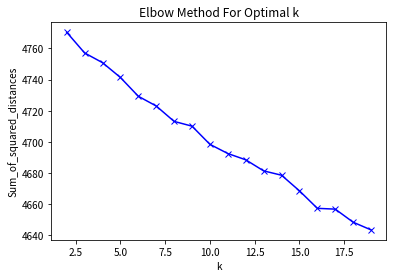

In [11]:
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=100, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Final clustering by k=?

In [12]:
true_k = 8
model = KMeans(n_clusters=true_k, 
               init='k-means++', 
               max_iter=200, n_init=10, random_state = 15)
model.fit(X)
labels=model.labels_
df4['cluster'] = labels

print(X.shape)
df4.head()

(4810, 10000)


,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text,cluster
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[大哥, 吉雷米, 互動, 歡迎, 加入, 台灣, 溫馨, 家庭]",3
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 這高雄, 老外, 台語, 能力, 應該, 台北人]",2
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 客戶, 資料, 洩給, 中國, 現在, 紐約市, 學生用, 這系, 統視]",5
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行]",3
4,2_tXjqhbe5E,UgwStMgGuqJ4J60PfV94AaABAg,NaN,Makayla Kyo,按照節目規格外國來賓一律安排在坐在戴志揚大哥旁邊，不一樣的是上次是土耳其美女徐甘舒😆.......,0,2020-04-06T10:43:24Z,2020-04-06T10:43:24Z,"[節目規, 國來賓, 一律, 安排, 坐在, 戴志揚, 大哥, 旁邊, 不一樣, 上次, 土...",0


## Visualization

視覺化是必要選項。

In [13]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=50)
points = svd.fit_transform(X)
# points[:20]

df_point = pd.DataFrame(points, columns = ['x', 'y'])
df_merge = pd.concat([df4, df_point], axis='columns')
df_merge

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text,cluster,x,y
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[大哥, 吉雷米, 互動, 歡迎, 加入, 台灣, 溫馨, 家庭]",3,0.032070,0.006168
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 這高雄, 老外, 台語, 能力, 應該, 台北人]",2,0.042447,0.022471
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 客戶, 資料, 洩給, 中國, 現在, 紐約市, 學生用, 這系, 統視]",5,0.058612,0.051273
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行]",3,0.038333,0.016039
4,2_tXjqhbe5E,UgwStMgGuqJ4J60PfV94AaABAg,NaN,Makayla Kyo,按照節目規格外國來賓一律安排在坐在戴志揚大哥旁邊，不一樣的是上次是土耳其美女徐甘舒😆.......,0,2020-04-06T10:43:24Z,2020-04-06T10:43:24Z,"[節目規, 國來賓, 一律, 安排, 坐在, 戴志揚, 大哥, 旁邊, 不一樣, 上次, 土...",0,0.154403,-0.073790
...,...,...,...,...,...,...,...,...,...,...,...,...
4805,yRYyE05HmeY,UgzdZN41Tou01ZQD_md4AaABAg,NaN,陳文,"一直在等,57歲了,為什麼總是沒有遇見親眼見證或可以說服自己的所謂靈界事件",1,2019-08-24T05:25:13Z,2019-08-24T05:25:13Z,"[一直, 57, 總是, 遇見, 見證, 說服, 所謂, 靈界, 事件]",3,0.034861,0.014368
4806,yRYyE05HmeY,UgzdZN41Tou01ZQD_md4AaABAg,NaN,陳文,"一直在等,57歲了,為什麼總是沒有遇見親眼見證或可以說服自己的所謂靈界事件",1,2019-08-24T05:25:13Z,2019-08-24T05:25:13Z,"[一直, 57, 總是, 遇見, 見證, 說服, 所謂, 靈界, 事件]",3,0.034861,0.014368
4807,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z,"[自私, 水準, 中國人]",3,0.039881,0.013907
4808,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z,"[自私自利, 適者, 生存, 適者, 辦法, 有人, 最實]",3,0.015105,0.003279


In [14]:
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [15]:
def generate_color(x, total):
    def color_red_blue(ctr, reverse=False):
        r = int(ctr*255)
        b = 255-int(ctr*255)
        if reverse:
            return "#%02x%02x%02x" % (b, 0, r)
        else:
            return "#%02x%02x%02x" % (r, 0, b)
    return color_red_blue(x/total)

print(generate_color(1, 8))

#1f00e0


In [16]:
p = figure(title = "doc clustering")


colors = df_merge['cluster'].apply(lambda x:generate_color(x, true_k))

from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, d3
palletes = d3['Category20'][true_k]
colors = [palletes[clu] for clu in df_merge['cluster']]
# print(colors)
p.circle(df_merge["x"], df_merge["y"], color = colors, fill_alpha=0.2, size=10)
show(p)

In [27]:
from collections import defaultdict, Counter
cdict = defaultdict(Counter)
for k, v in zip(df4['cluster'], df4['token_text']):
    for word in v:
        cdict[k][word] += 1
for c in cdict:
    print(cdict[c].most_common(20))
    print("-"*80)

[('香港', 449), ('台灣', 308), ('知道', 168), ('真的', 148), ('中共', 117), ('一個', 91), ('已經', 68), ('問題', 64), ('新聞', 58), ('自由', 56), ('現在', 55), ('這是', 54), ('移民', 52), ('口罩', 50), ('哈哈哈', 49), ('一定', 48), ('政府', 45), ('總統', 45), ('人生', 45), ('一直', 43)]
--------------------------------------------------------------------------------
[('父母', 153), ('女人', 133), ('應該', 122), ('男人', 107), ('生活', 98), ('阿嬌', 94), ('香港', 86), ('一個', 76), ('真的', 75), ('問題', 73), ('根本', 60), ('婚姻', 60), ('知道', 59), ('這種', 59), ('覺得', 57), ('結婚', 54), ('家庭', 51), ('對方', 49), ('男方', 47), ('女兒', 47)]
--------------------------------------------------------------------------------
[('中國', 228), ('香港', 120), ('台灣', 84), ('中共', 24), ('政府', 23), ('中國人', 23), ('口罩', 18), ('國家', 17), ('社會', 17), ('一個', 16), ('問題', 15), ('美國', 15), ('封鎖', 15), ('真的', 14), ('萬人', 13), ('開放', 12), ('自由', 12), ('土匪', 12), ('包屁', 12), ('行凶', 12)]
--------------------------------------------------------------------------------
[('香港', 287), ('台灣', 

In [18]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Noto Sans TC']

In [2]:
from matplotlib.font_manager import findfont, FontProperties
findfont(FontProperties(family = FontProperties().get_family()))

'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NotoSansTC-Regular.otf'

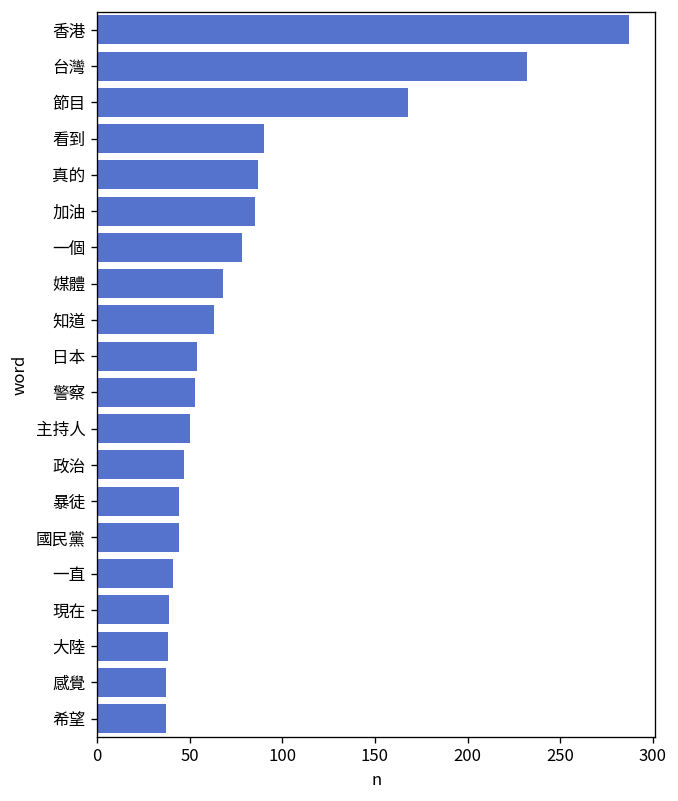

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35828 missing from current font.
  font.set_text(s, 0, flags=flags)


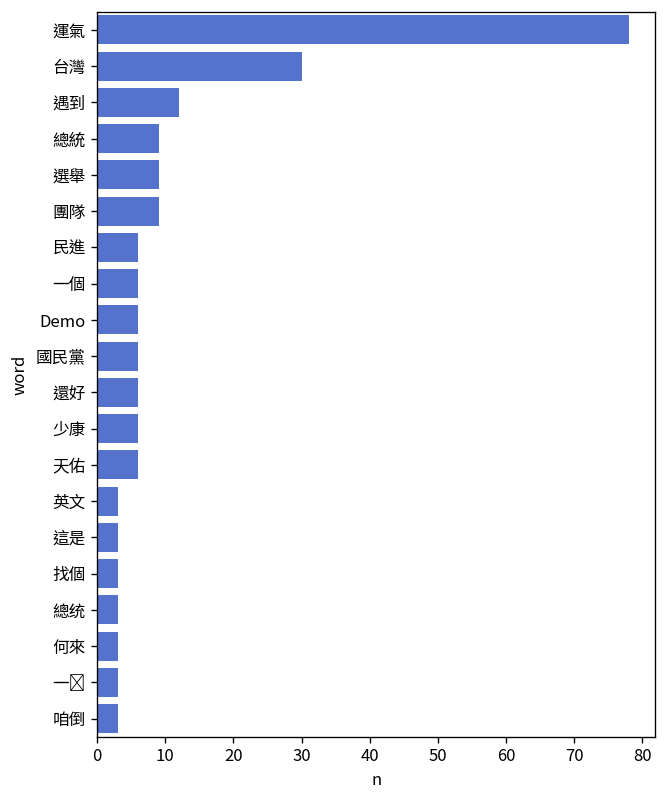

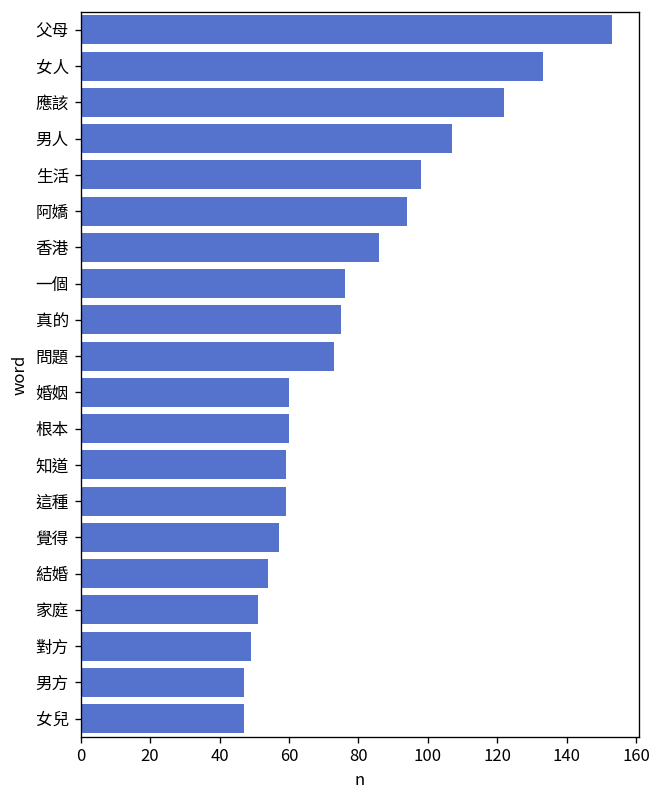

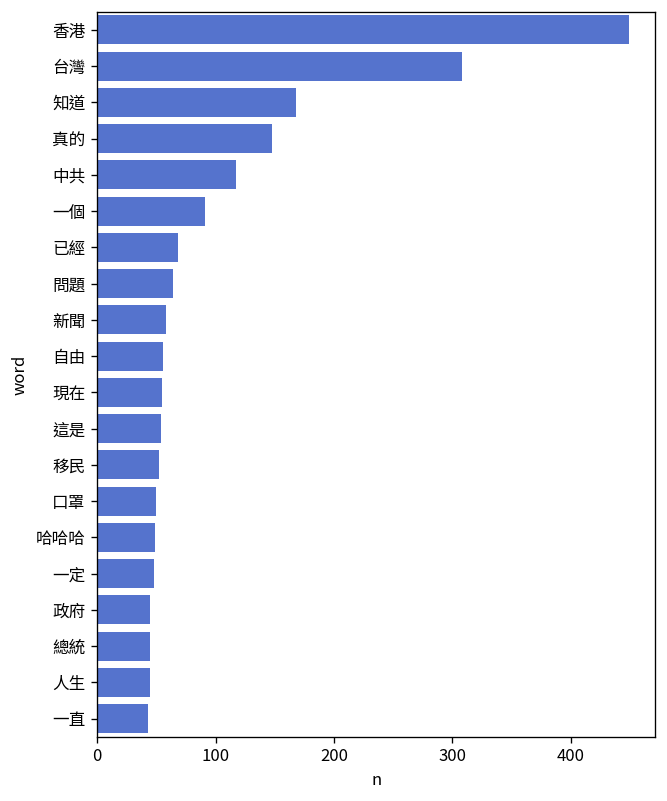

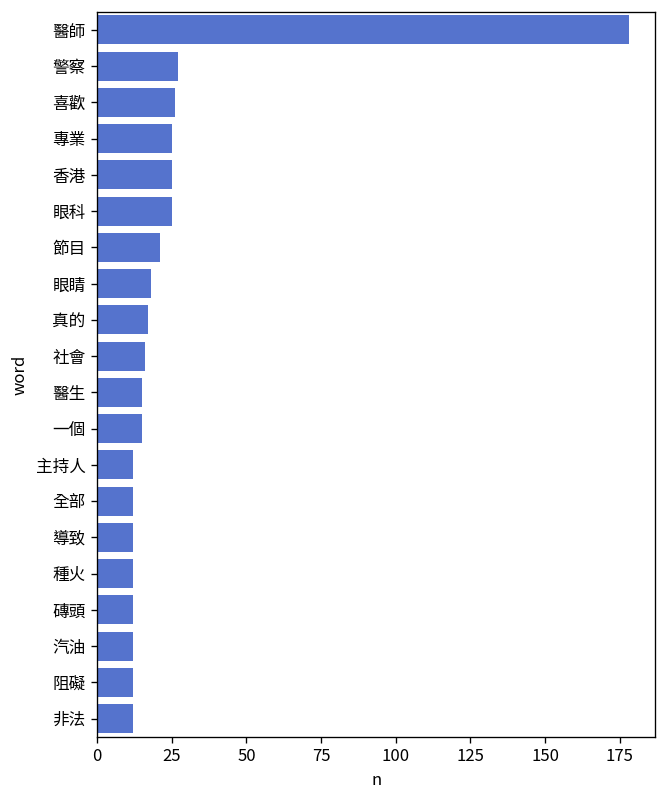

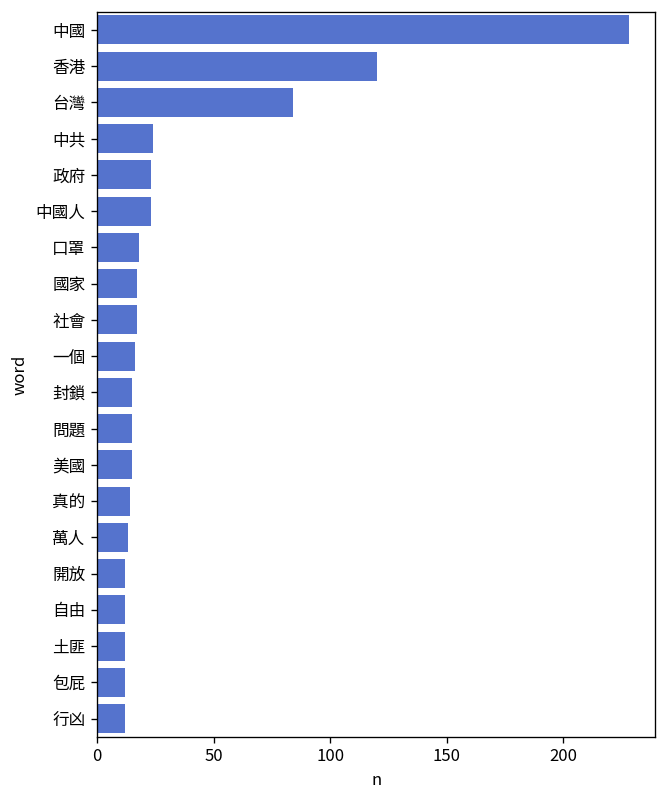

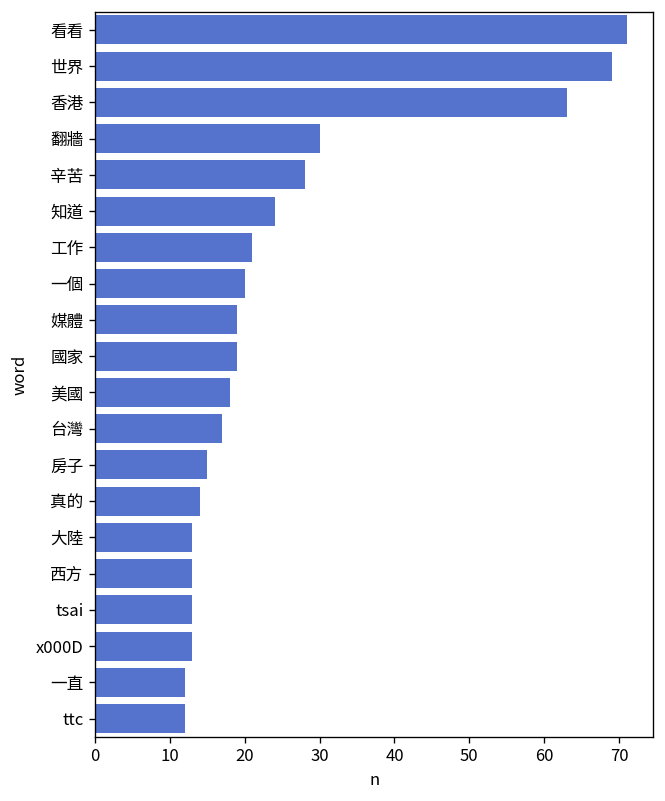

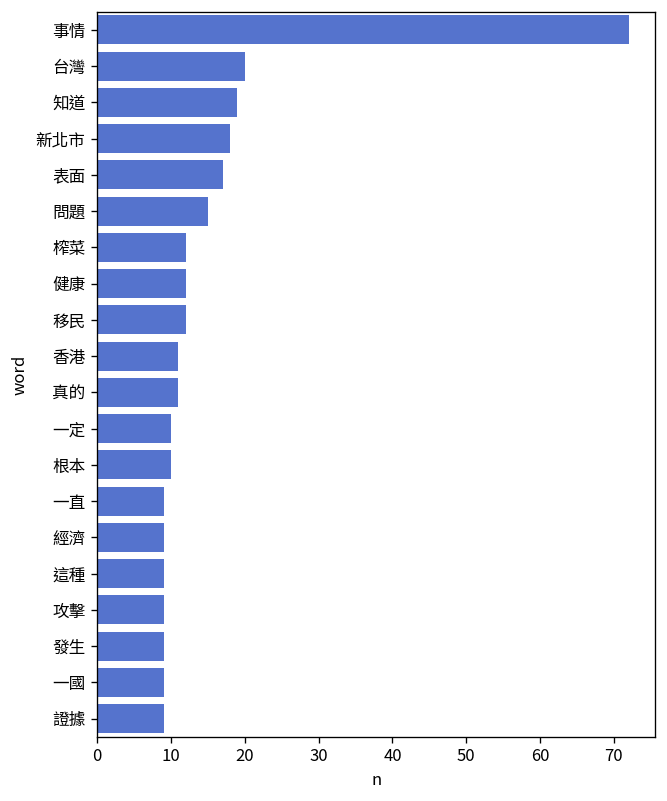

In [19]:
for clu in range(true_k):
    df1 = pd.DataFrame(list(cdict[clu].most_common(20)), columns = ['word', 'n'])
    plt.figure(figsize=(6, 8), dpi=120) 
    df_data = df1.sort_values('n', ascending=False)
#     print(df_data)
    sns.barplot(x='n', 
                y='word', 
                data=df_data, 
                label='word', 
                color='royalblue',
               )

In [26]:
# df4
# print(df4.loc[2, 'token_text'])
# for i in range(4810):
#     for y in range(len(df4.loc[i, 'token_text'])):
#         if df4.loc[i, 'token_text'][y] == "種火":
#             print(df4.loc[i, 'textOriginal'])
#             print(i, y)
#             continue
    

## (TODO) Explaining your results
從上述群集的結果，你觀察到有哪些留言群集？請評估你所找出來的關鍵字群集。

In [28]:
for c in cdict:
    print(cdict[c].most_common(20))
    print("-"*80)

[('香港', 449), ('台灣', 308), ('知道', 168), ('真的', 148), ('中共', 117), ('一個', 91), ('已經', 68), ('問題', 64), ('新聞', 58), ('自由', 56), ('現在', 55), ('這是', 54), ('移民', 52), ('口罩', 50), ('哈哈哈', 49), ('一定', 48), ('政府', 45), ('總統', 45), ('人生', 45), ('一直', 43)]
--------------------------------------------------------------------------------
[('父母', 153), ('女人', 133), ('應該', 122), ('男人', 107), ('生活', 98), ('阿嬌', 94), ('香港', 86), ('一個', 76), ('真的', 75), ('問題', 73), ('根本', 60), ('婚姻', 60), ('知道', 59), ('這種', 59), ('覺得', 57), ('結婚', 54), ('家庭', 51), ('對方', 49), ('男方', 47), ('女兒', 47)]
--------------------------------------------------------------------------------
[('中國', 228), ('香港', 120), ('台灣', 84), ('中共', 24), ('政府', 23), ('中國人', 23), ('口罩', 18), ('國家', 17), ('社會', 17), ('一個', 16), ('問題', 15), ('美國', 15), ('封鎖', 15), ('真的', 14), ('萬人', 13), ('開放', 12), ('自由', 12), ('土匪', 12), ('包屁', 12), ('行凶', 12)]
--------------------------------------------------------------------------------
[('香港', 287), ('台灣', 

(Your Answer here)
在前述篩選策略下，從Evaluating的結果，我選擇以k=8作為群集數。
經視覺化每個群集的關鍵字後，一共發現以下幾大主題。
1. k=0: 該群集的主要關鍵字為中國、香港、台灣、政府、新聞自由等等，應當就是主要在講香港反送中運動的
2. k=1: 該群集的主要關鍵字為父母、婚姻、男女，感覺主題偏婚姻向
3. k=2: 該群集的主要關鍵字為中國、香港、台灣、政府
4. k=3: 該群集的主要關鍵字為中國、香港、台灣、政府
5. k=4: 該群集的主要關鍵字為世界、翻牆、辛苦，應該是跟中國網域封鎖有關
6. k=5: 該群集的主要關鍵字為醫生、醫師、眼科，感覺跟醫療有所相關(可能跟李文亮醫生、反送中抗議者被弄瞎眼睛有關)
7. k=6: 該群集的主要關鍵字為新北市、經濟、移名，感覺與移工對經濟影響有關
8. k=7: 該群集的主要關鍵字為總統、選舉、英文、民進、國民黨，應當跟台灣政府當局有相關

有效的主題我認為共有「男女婚姻（k=1)」、「香港反送中運動（k=0, 2, 3）」、「中國網域封鎖（k=4）」、「台灣移工經濟(k=6)」、「台灣政府當局(k=7)」、「醫療相關(k=5)」等n個主題。

`k=5`的群集只有單一關鍵字"醫師"極高，其他關鍵字稀少，可能是受到李文亮醫生及反送中的遮眼手勢有關。將包含關鍵字相關的留言抽出結果如下方dataFrame所示，結果竟然是台灣國內"黃軒醫師"相關的留言居多，跟香港反送中事件相關性並不大。

In [30]:
df4
print(df4.loc[2, 'token_text'])
for i in range(4810):
    for y in range(len(df4.loc[i, 'token_text'])):
        if df4.loc[i, 'token_text'][y] == "醫師":
            print(df4.loc[i, 'textOriginal'])
            print(i, y)
            break

['Zoom', '客戶', '資料', '洩給', '中國', '現在', '紐約市', '學生用', '這系', '統視']
按照節目規格外國來賓一律安排在坐在戴志揚大哥旁邊，不一樣的是上次是土耳其美女徐甘舒😆.....吉雷米的反應好快，和主持人講台語超有趣的😆！也超愛揪古錐欸黃醫師，要好好保持健康噢🤗！謝謝節目提高我們的防疫觀念！還有全台灣的醫療人員們，謝謝你們你們辛苦了☺️！
4 21
我也好喜歡黃軒醫師  很可愛的笑容
35 1
黃軒醫師好隨時好有趣，喜歡看黃軒醫師上節目
46 0
我好喜歡黃醫師, 他的笑容好燦爛  每次講話也很風趣!  非常有趣的一位醫師!
54 1
黃醫師幽默有趣、一粒米的台語發音很道地、對他的書也很好奇，主持人穿針引線、今晚挖出防疫話題的輕鬆面、觀賞得很開心！
60 0
有黃軒醫師必看，謝謝製作組的用心！
78 1
那位黃醫師是不是來的太密了？ 也講太多 。。煩
79 1
黃醫師講話就是中肯、精闢，👍
88 0
這個黃醫師講話真的很離題....
90 0
挖挖哇太沒有操守，台灣傳媒完全沒有了解事實嘅全部！而且女示威傷者未經證實是誰導致的傷！

示威者種火，掉向警處掉磚頭、汽油彈、化學粉末；向警員眼睛射高能量激光，襲警，嚴重毀壞警車；向警察宿舍仍磚頭、種火、扔水，拆門、在牆上寫仇恨言語、欺凌警察子女、收錢；阻礙孕婦乘搭地鐵導致不適，阻礙道路，隧道；在機場非法禁錮遊客，環球記者，虐打旅客；非法禁錮政見不同嘅市民，無差別虐打；導致有警察面骨裂傷留醫54天以上，汽油彈導致警察燒傷。破壞交通燈，剪電箱。

太令人失望全部沒講，一面倒的偏袒，所以不會再看挖挖哇！

黃醫師被討厭是有原因的，單向思想，嘩眾取寵！
91 80
有姚惠珍和黃醫師必看
100 1
推黃醫師的專業，也很擔心台灣變成香港，不要選進去中聯辦拜碼頭的那個人
120 1
我住香港 我是香港人 喜歡這一集 以往我也覺得香港人真的好冷漠好自私 自六月起我才發覺香港人原來是這麼有愛這麼有毅力 尢其是年輕人 香港何其有幸 我們的年輕人這麼的優秀 I’m really proud of HK 👍🏼🙏🏼👍🏼喜歡黃醫師 謝謝你的發言
123 28
黃醫師與網友們，臺灣的「公共電視」(PTS)周一~周四、晚間八點~九點【有話好說】(主持人:陳信聰)討論過很多集了，網路上應該有影片存檔；僅此提供相

## Final Modification (if you have)
經觀察前述群集結果後，我篩除了XXX關鍵字，重新進行群集後所得到的結果為以下幾個主題，分別包含「XXXX（k=0, 1」、「XXXXX（k=2）」、「XXXXX（k=3, 4）」、「」
